In [1]:
library(scCustomize,lib.loc = "/hsfscqjf2/ST_CQ/Reference/software/R_lib")
library(Seurat)
library(tidyverse)
library(RCurl)
library(cowplot)
library(tidyverse)
library(ggplot2)
library(Matrix)
library(scales)
library(cowplot)
library(RCurl)
library(dplyr)
library(patchwork)
library(ggraph,lib.loc = "/hsfscqjf2/ST_CQ/Reference/software/R_lib")
library(pheatmap)
library(gghalves,lib.loc = "/hsfscqjf2/ST_CQ/Reference/software/envs/ClusterGVis/lib/R/library")
library(ggpubr)

Loading required package: Seurat

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


scCustomize v1.1.3
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘

In [2]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/5_anno/"
figuredir<-resultdir
setwd(resultdir)


# annotation

In [3]:
seurat_integrated<-readRDS("../2_scanpy_base_timepoint/cluster_raw_rank.rds")
seurat_integrated@meta.data$seurat_clusters<-seurat_integrated@meta.data$cluster
Idents(seurat_integrated)<-seurat_integrated@meta.data$seurat_clusters
table(Idents(seurat_integrated))


    0     1     2     3     4     5     6     7     8     9    10    11    12 
26798 20725 19992 18310 13574 11036  7461  3980  1721   790   665   355   257 
   13    14    15    16 
  219   158    71    49 

In [4]:
DefaultAssay(seurat_integrated) <- "RNA" 

In [5]:
# anno celltype
seurat_integrated <- RenameIdents(seurat_integrated, `0` = "Wing_morphogenesis", #alse called to Cell_morphogenesis
                                  `1` = "Immune", 
                                  `2` = "Epithelial_2", 
                                  `3` = "Epithelial_1", 
                                  `4` = "Matrix", #alse called to Apoptosis 
                                  `5` = "Cuticle_3",
                                  `6` = "Immune", 
                                  `7` = "Cuticle_1", 
                                  `8` = "Cuticle_2",
                                  `9` = "Cuticle_3", 
                                  `10` = "Epithelial_3", 
                                  `11` = "Axon_development",
                                  `12` = "Metabolic_process", 
                                  `13` = "Cuticle_3", 
                                  `14` = "Ciliated_cell",
                                  `15` = "Others", 
                                  `16` = "Others"
                                  
                         )
seurat_integrated@meta.data$celltype_v1 <- Idents(seurat_integrated)

In [6]:
seurat_integrated@meta.data$timepoint <- factor(seurat_integrated@meta.data$timepoint,levels=c("L5D1","L5D2","L5D3","L5D4","L5D5","L5D6","L5D7","WD1","WD2","P6"))

In [8]:
# saveRDS(seurat_integrated,file='anno.rds')

In [12]:
filter_obj<-subset(seurat_integrated,idents = "Others",invert=T)

#  plot umap

In [13]:
Idents(filter_obj)<-filter_obj$timepoint

In [14]:
median(filter_obj@meta.data$nGene)
median(filter_obj@meta.data$nUMI)

[1] 1989

[1] 6209

In [15]:
data <- filter_obj@meta.data

In [17]:
pal=c("Wing_morphogenesis"='#1f77b4',
      "Epithelial_1"='#279e68',
      "Epithelial_2"='#98df8a',
      "Epithelial_3"='#b5bd61',
      "Cuticle_1"='#d62728',
      "Cuticle_2"='#e377c2',
      "Cuticle_3"='#ff9896',
      "Immune"='#f7b6d2',
      "Matrix"='#aa40fc',
      "Metabolic_process"='#c49c94',
      "Axon_development"='#ffbb78',
      "Ciliated_cell"='#ff7f0e')
pal_timepoint_sc<-c("L5D1"="#EEE8DA",
                    "L5D2"="#BFE2E3",
                    "L5D3"="#A1CFFA",
                    "L5D4"="#A0BFAF",
                    "L5D5"="#78BDAD",
                    "L5D6"="#397A7F",
                    "L5D7"="#1F5392",
                    "WD1"="#F0918E",
                    "WD2"="#D45651",
                    "P6"="#AE98D6")
order =c( "Ciliated_cell",
          "Axon_development",
          "Metabolic_process",
          "Matrix",
          "Immune",
          "Cuticle_3",
          "Cuticle_2",
          "Cuticle_1",
          "Epithelial_3",
          "Epithelial_2",
          "Epithelial_1",
          "Wing_morphogenesis"
)
data$celltype_v1 <- factor(data$celltype_v1,levels = order)

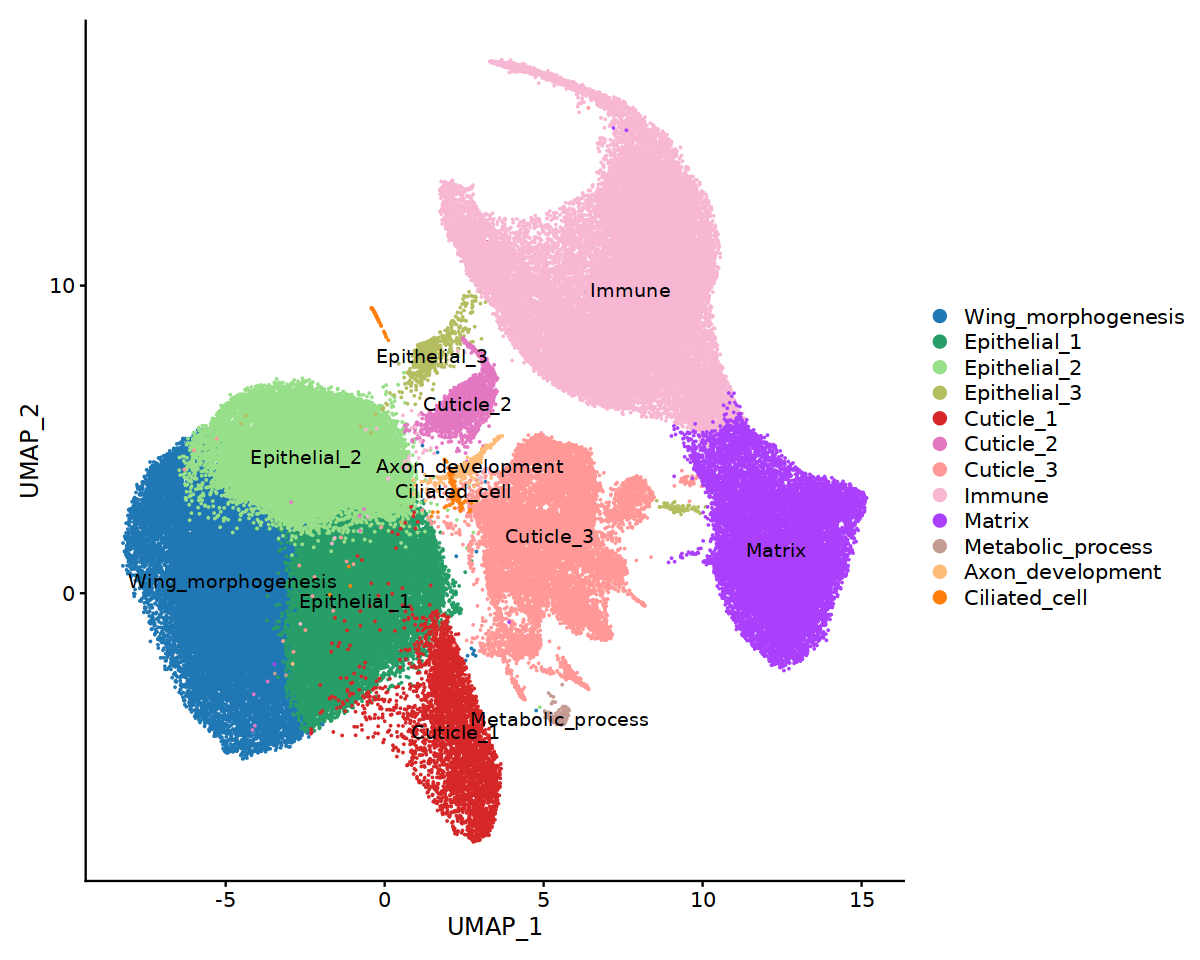

In [24]:
width=10
height=8
Idents(filter_obj)<-filter_obj$celltype_v1
options(repr.plot.width = width, repr.plot.height=height)
p1<-print(DimPlot(filter_obj, reduction="umap",label =T,
                  cols=pal,
                  order=order,
                  raster=FALSE))
ggsave(p1, filename="umap.pdf", path=figuredir,width = width,height = height)



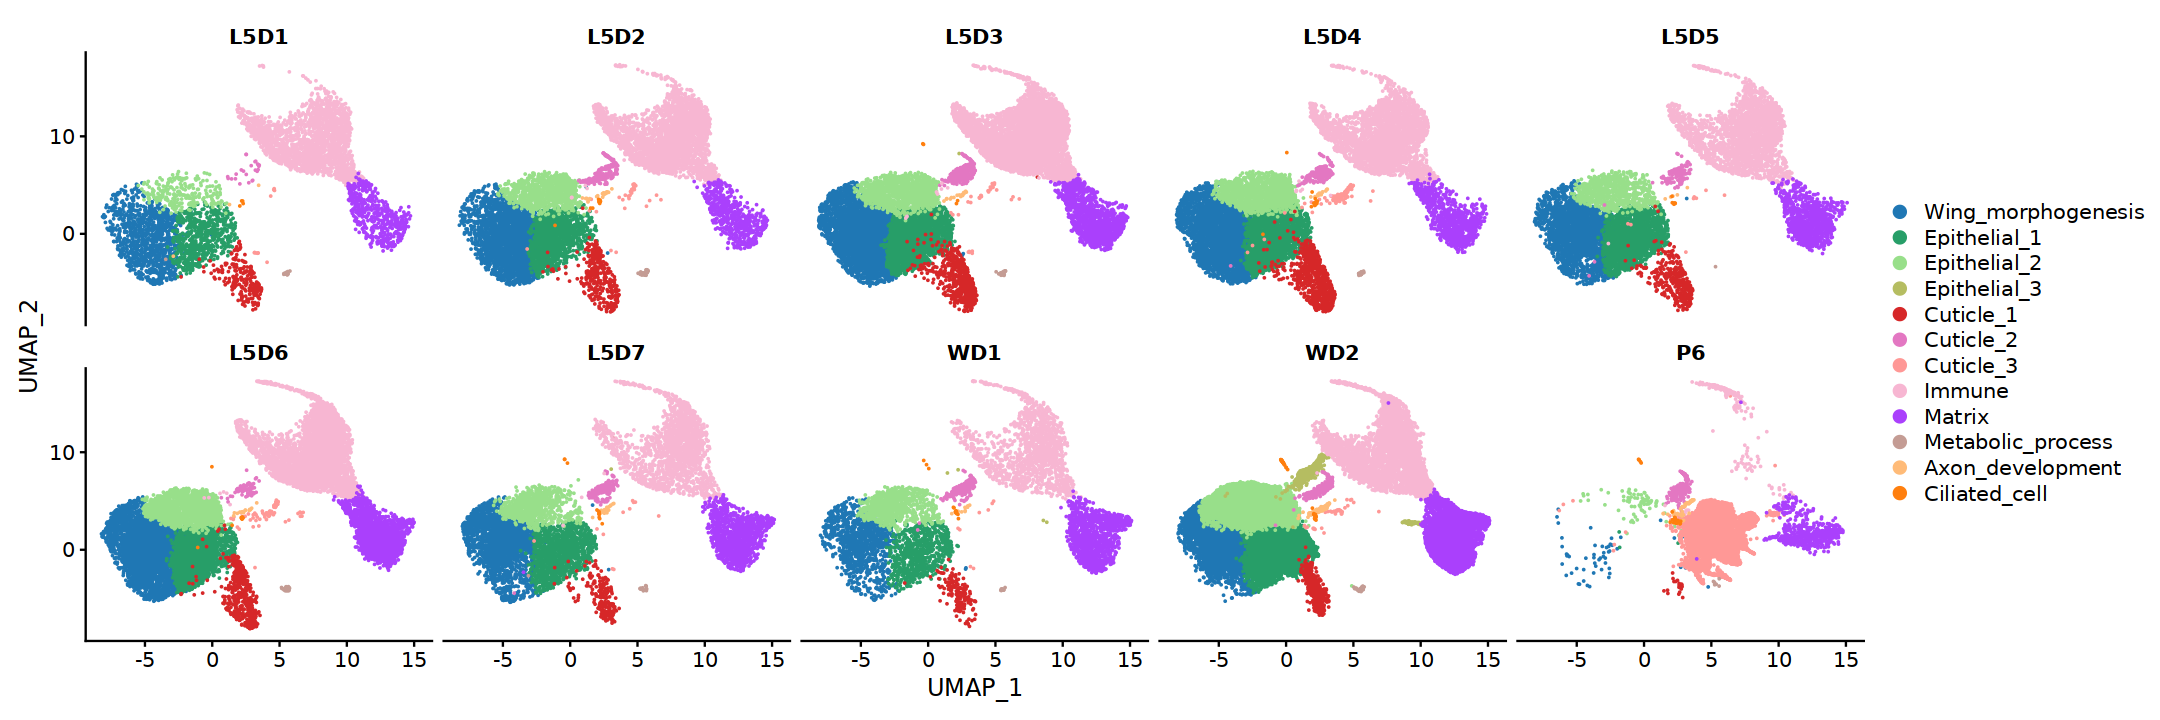

In [21]:
width=18
height=6
options(repr.plot.width = width, repr.plot.height=height)

p4<-print(DimPlot(filter_obj, reduction="umap",split.by ="timepoint",ncol =5,cols=pal,label =F,order=order,raster=FALSE))
ggsave(p4, filename="umap_split_timepoint.pdf", path=figuredir,width = width,height = height)

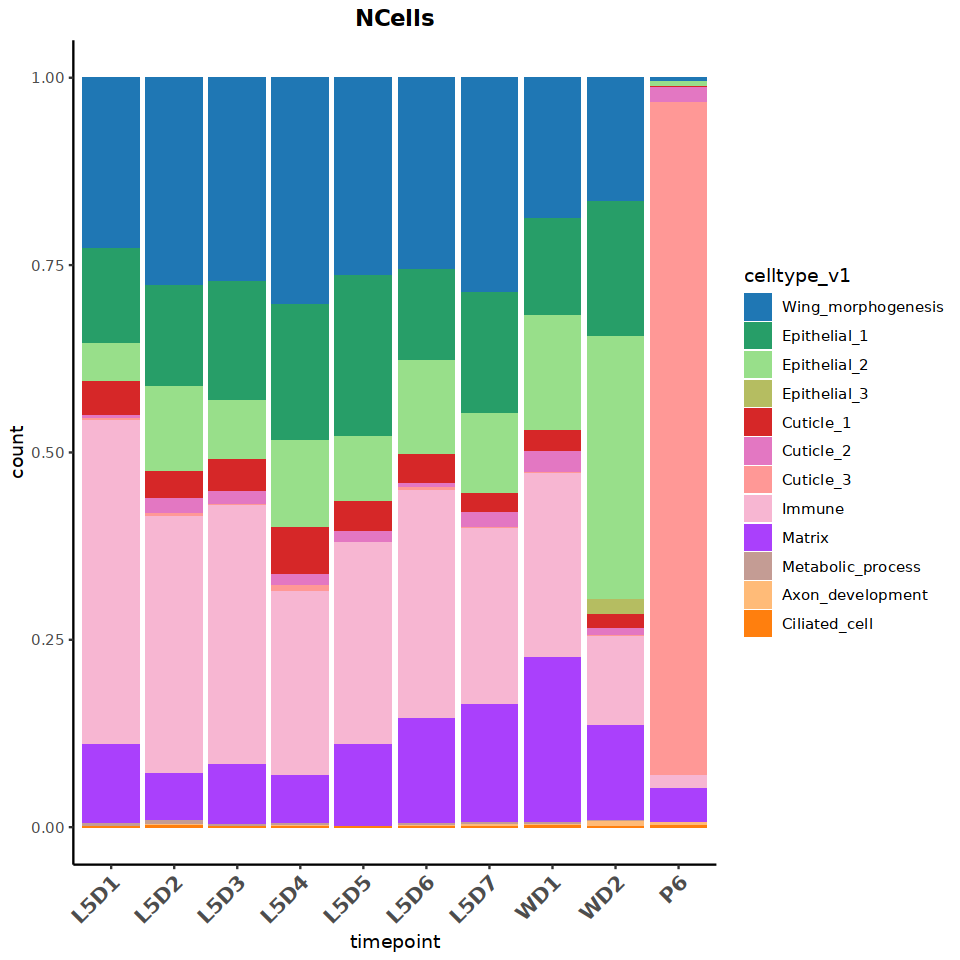

In [22]:
options(repr.plot.width = 8, repr.plot.height=8)
data<-filter_obj@meta.data
data$celltype_v1<-factor(data$celltype_v1,levels = rev(order))
p5<-print(data %>%      
       ggplot(aes(x=timepoint, fill=celltype_v1)) +
      geom_bar(aes(fill = celltype_v1), 
                   position = 'fill') +
scale_fill_manual(values=pal)+
      theme_classic() +
      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      ggtitle("NCells"))

ggsave(p5, filename="ncells_split_timepoint.pdf", path=figuredir,width = 8,height = 8)

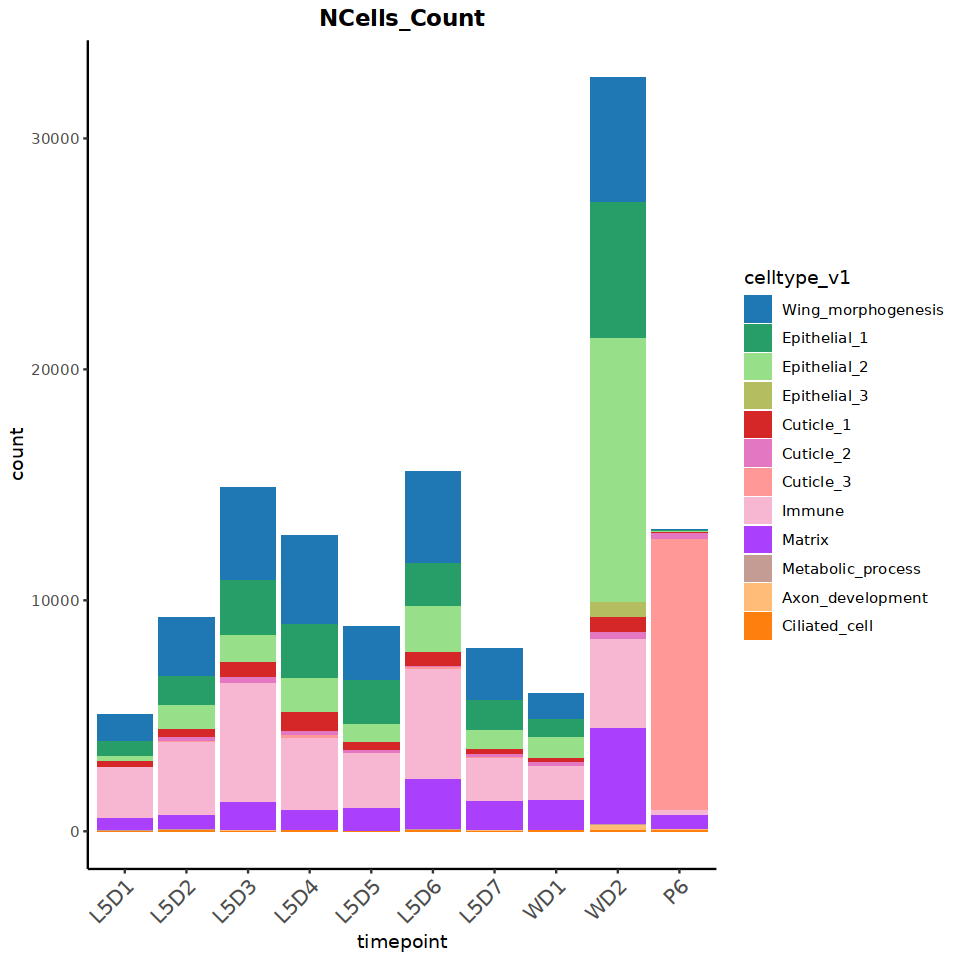

In [23]:
options(repr.plot.width = 8, repr.plot.height=8)
data<-filter_obj@meta.data
data$celltype_v1<-factor(data$celltype_v1,levels = rev(order))
p5<-print(data %>%      
       ggplot(aes(x=timepoint, fill=celltype_v1)) +
      geom_bar( ) +
scale_fill_manual(values=pal)+
      theme_classic() +
      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 12)) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      ggtitle("NCells_Count"))

ggsave(p5, filename="ncells_split_timepoint_count.pdf", path=figuredir,width = 8,height = 8)

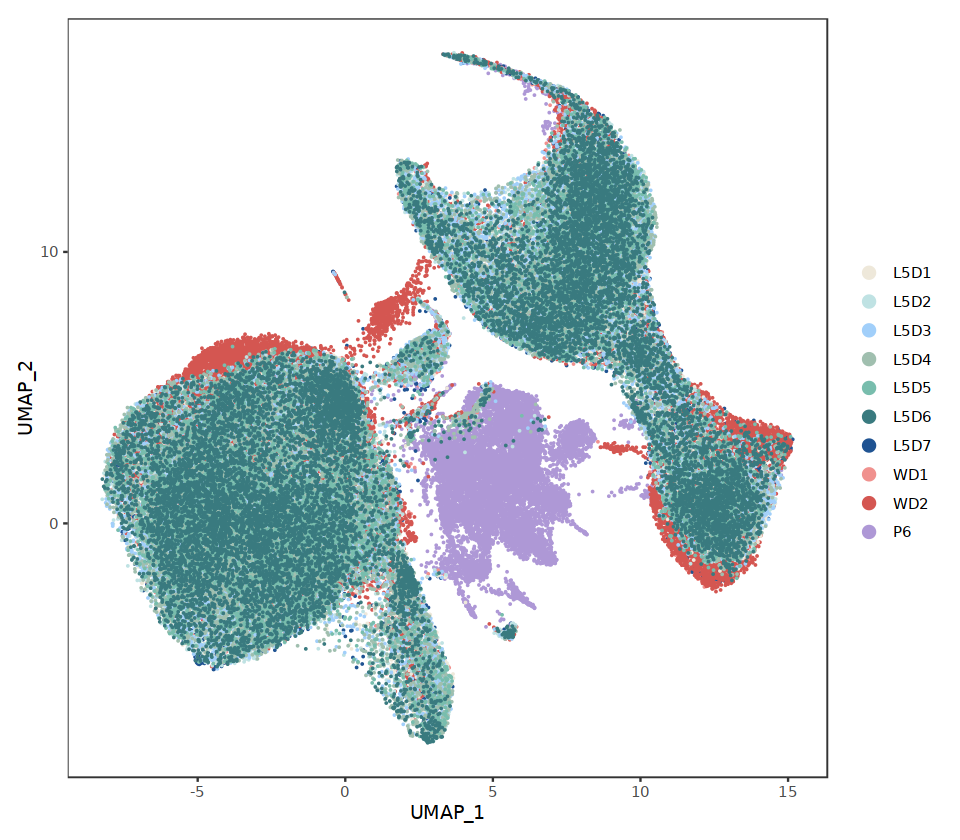

In [25]:
width=8
height=7
options(repr.plot.width = width, repr.plot.height=height)
Idents(filter_obj)<-filter_obj$timepoint
filter_obj$timepoint<-factor(filter_obj$timepoint,levels = c("L5D1","L5D2","L5D3","L5D4","L5D5","L5D6","L5D7","WD1","WD2","P6"))
p1<-print(DimPlot(filter_obj, reduction="umap",cols=pal_timepoint,label =F,raster=FALSE)+
         theme_bw()+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank()))
ggsave(p1, filename="umap_timepoint.pdf", path=figuredir,width = width,height = height)


In [26]:
# saveRDS(filter_obj,file = "anno_filter.rds")

# celltype counts

In [27]:
# filter_obj<-readRDS(file = "anno_filter.rds")

In [29]:
Idents(filter_obj)<-filter_obj$celltype_v1
metadata<-filter_obj@meta.data
write.csv(metadata,file="metadata.csv")

In [30]:
options(repr.plot.width = 10, repr.plot.height=10)
data<-as.data.frame(table(filter_obj@meta.data$timepoint,filter_obj@meta.data$celltype_v1))
colnames(data)<-c("timepoint","celltype","count")

plot.data<-data %>%
  group_by(timepoint,celltype) %>% 
summarise(n = sum(count)) %>%mutate(percentage = n/sum(n)) 
# str(plot.data)
write.csv(plot.data,file="plot_data_line.csv")


`summarise()` has grouped output by 'timepoint'. You can override using the
`.groups` argument.


In [32]:
plot.data<-read.csv(file="plot_data_line.csv")


In [33]:
plot.data$timepoint <- factor(plot.data$timepoint,levels=c("L5D1","L5D2","L5D3","L5D4","L5D5","L5D6","L5D7","WD1","WD2","P6"))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


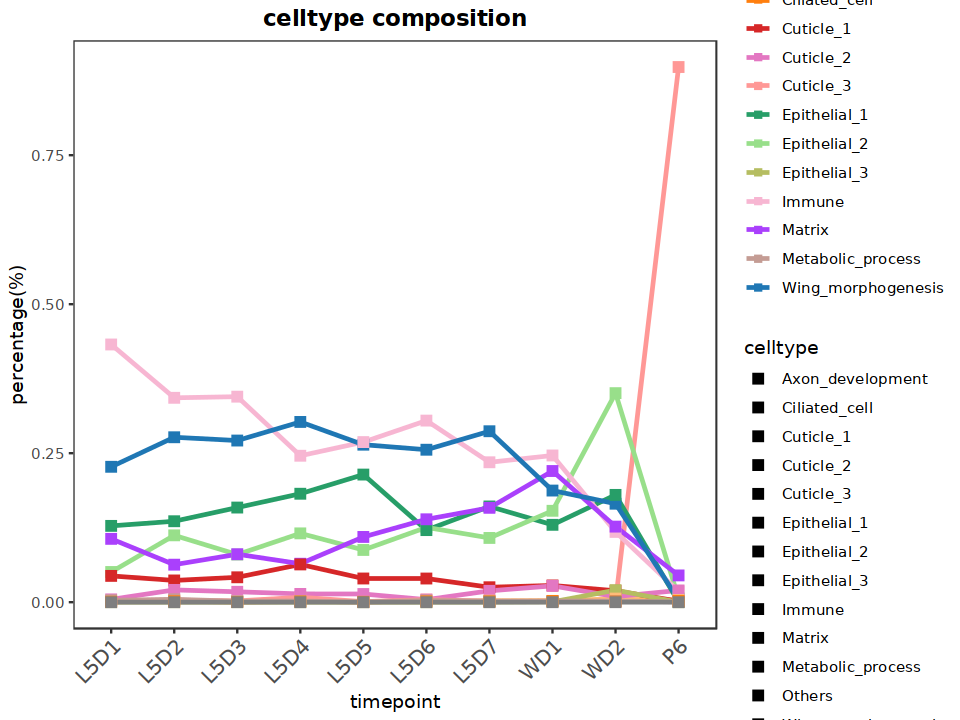

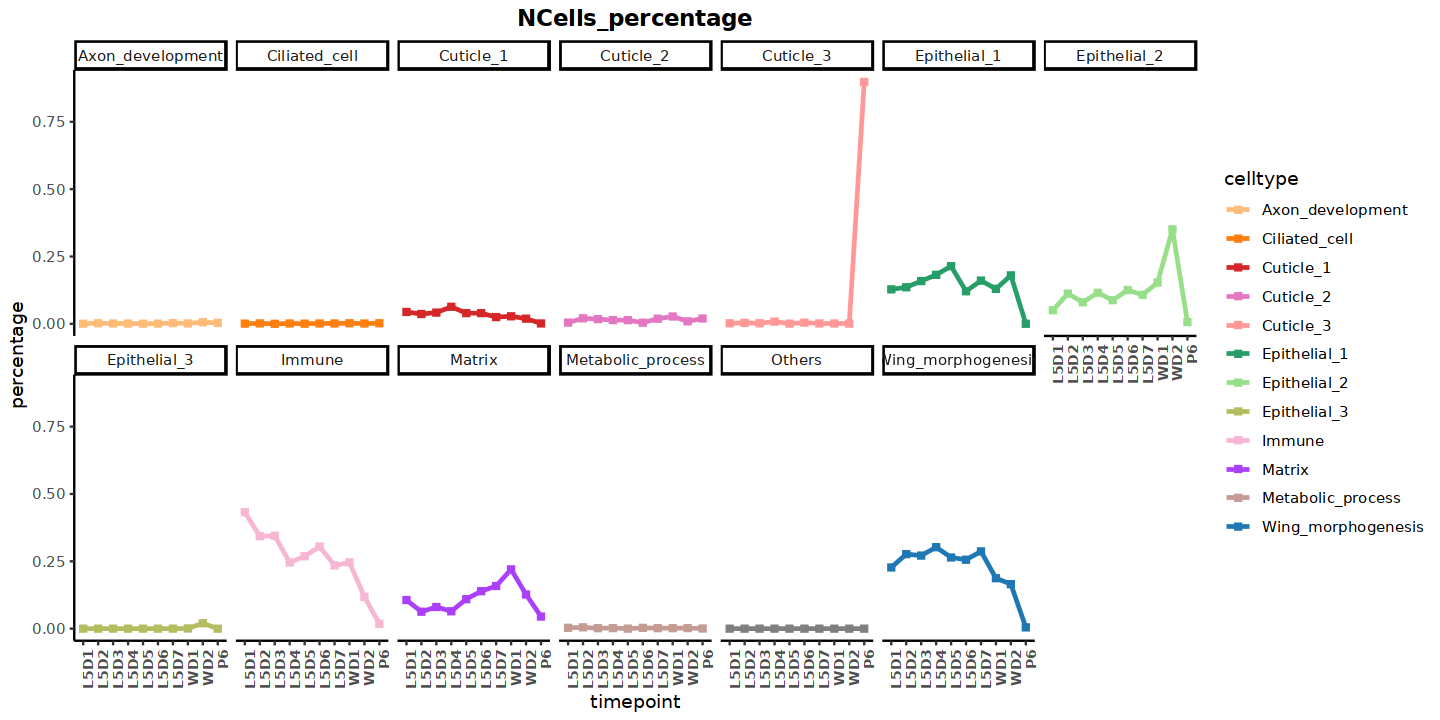

In [34]:
width=8
height=6
options(repr.plot.width = width, repr.plot.height=height)
p4<-print(      
       ggplot(plot.data,aes(x=timepoint, y=percentage,group=celltype,fill=celltype)) +
      geom_line( aes(color=celltype),size = 1) +
     geom_point(aes(color=celltype),shape=15,size = 3)+
    # geom_point(data2,mapping =aes(x=timepoint_2, y=percentage,group=celltype_level1,fill=celltype_level1),colour="#000099",show_guide = T)+
    # facet_wrap(vars(celltype_level1), scales = "free")+
        scale_color_manual(values=pal)+
    guides(colour = guide_legend(override.aes = list(size=2)))+
       theme_bw()+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 12)) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
          labs(x="timepoint",y = "percentage(%)",title = "celltype composition"))

ggsave(p4, filename="celltype_percentage_timepoint_plot_line.pdf",width = width,height = height)


width=12
height=6
options(repr.plot.width = width, repr.plot.height=height)
p2<-print( ggplot(plot.data,aes(x=timepoint, y=percentage, color = celltype,group = celltype)) +
            geom_line(size = 1) + 
     geom_point(size = 2,shape = 15) + 
scale_color_manual(values=pal)+
      theme_classic() +
      theme(axis.text.x = element_text(angle = 90,vjust = 1, hjust=1,size = 8,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
       facet_wrap(vars(celltype), nrow = 2)+ #分面
      ggtitle("NCells_percentage"))

ggsave(p2, filename="cluster_percentage_split_timepoint_line_facet.pdf", path=resultdir,width = width,height = height)

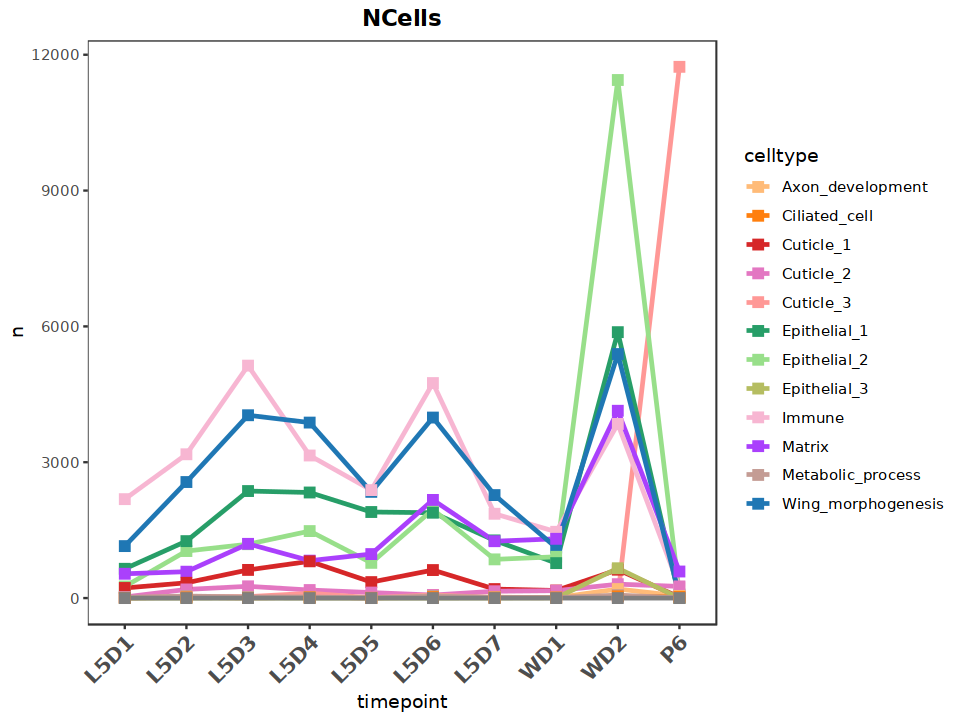

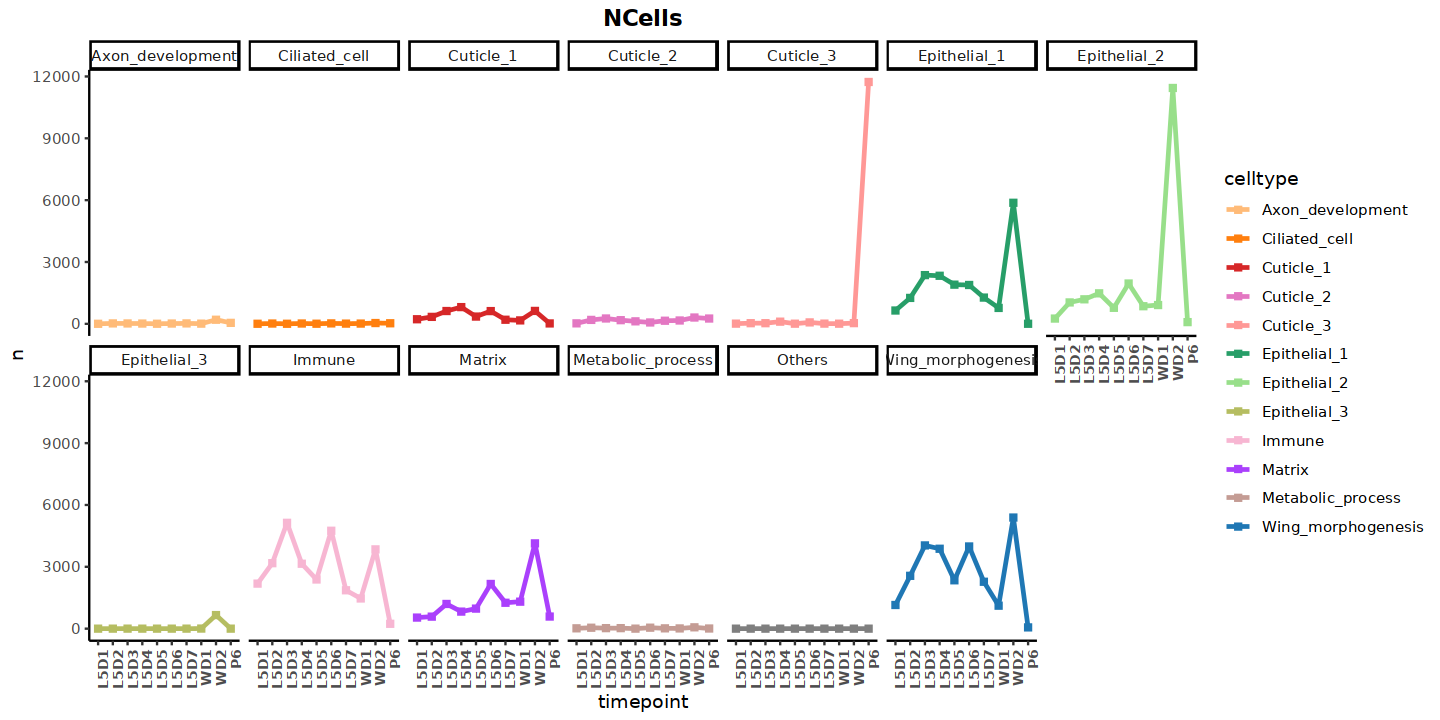

In [35]:
width=8
height=6
options(repr.plot.width = width, repr.plot.height=height)

p1<-print( ggplot(plot.data,aes(x=timepoint, y=n, color = celltype,group = celltype)) +
            geom_line(size = 1) + 
     geom_point(size = 3,shape=15) + 
scale_color_manual(values=pal)+
       theme_bw()+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      ggtitle("NCells"))

ggsave(p1, filename="cluster_ncells_split_timepoint_line.pdf", path=resultdir,width = 10,height = 10)



width=12
height=6
options(repr.plot.width = width, repr.plot.height=height)
p2<-print( ggplot(plot.data,aes(x=timepoint, y=n, color = celltype,group = celltype)) +
            geom_line(size = 1) + 
     geom_point(size = 2,shape=15) + 
scale_color_manual(values=pal)+
      theme_classic() +
      theme(axis.text.x = element_text(angle = 90,vjust = 1, hjust=1,size = 8,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
       facet_wrap(vars(celltype), nrow = 2)+ #分面
      ggtitle("NCells"))

ggsave(p2, filename="cluster_ncells_split_timepoint_line_facet.pdf", path=resultdir,width = width,height = height)

In [36]:
group1<-c("Wing_morphogenesis")
group2<-c("Epithelial_1","Epithelial_2","Epithelial_3")
group3<-c("Cuticle_1","Cuticle_2","Cuticle_3")
group4<-c("Immune")
group_list<-list(group1,group2,group3,group4)


In [37]:
library(ggplot2)
library(scales)

# 自定义压缩函数（来自知乎方法[2,6](@ref)）
squash_axis <- function(from, to, factor) {
  trans <- function(x) {
    isq <- x > from & x < to
    ito <- x >= to
    x[isq] <- from + (x[isq] - from)/factor
    x[ito] <- from + (to - from)/factor + (x[ito] - to)
    return(x)
  }
  inv <- function(x) {
    isq <- x > from & x < from + (to - from)/factor
    ito <- x >= from + (to - from)/factor
    x[isq] <- from + (x[isq] - from) * factor
    x[ito] <- to + (x[ito] - (from + (to - from)/factor))
    return(x)
  }
  trans_new("squash_axis", trans, inv)
}


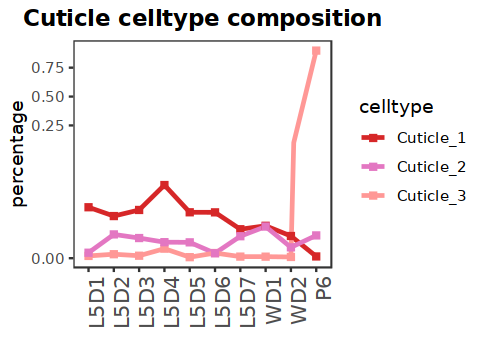

In [38]:
width=4
height=3
options(repr.plot.width = width, repr.plot.height=height)
i=3
group<-plot.data%>%filter(celltype%in% group_list[[i]])
    p<-print(ggplot(group,aes(x=timepoint, y=percentage,group=celltype,color=celltype)) +
      geom_line( size=1) +
     geom_point(size=2,shape = 15)+
        scale_color_manual(values=pal)+
    guides(colour = guide_legend(override.aes = list(size=2)))+
      theme_classic() +
            theme_bw()+
             coord_trans(y = squash_axis(0.1, 0.9, 10))+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      theme(axis.text.x = element_text(angle = 90,vjust = 1, hjust=1,size = 12)) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
     labs(x=" ",y = "percentage",title = paste0("Cuticle celltype composition")))
    ggsave(p, filename=paste0("cuticle_celltype_percentage_timepoint_plot_line.pdf"),width = width,height = height)



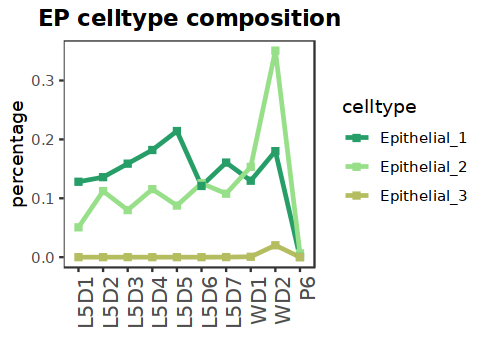

In [39]:
width=4
height=3
options(repr.plot.width = width, repr.plot.height=height)
i=2
group<-plot.data%>%filter(celltype%in% group_list[[i]])
    p<-print(ggplot(group,aes(x=timepoint, y=percentage,group=celltype,color=celltype)) +
      geom_line( size=1) +
     geom_point(size=2,shape = 15)+
        scale_color_manual(values=pal)+
    guides(colour = guide_legend(override.aes = list(size=2)))+
      theme_classic() +
            theme_bw()+
             # coord_cartesian(ylim = c(0, 0.4))+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      theme(axis.text.x = element_text(angle = 90,vjust = 1, hjust=1,size = 12)) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
     labs(x=" ",y = "percentage",title = paste0("EP celltype composition")))
    ggsave(p, filename=paste0("EP_celltype_percentage_timepoint_plot_line.pdf"),width = width,height = height)

